In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [713]:
path1 = 'data/Assignment 2 - new.app4.csv'
path2 = 'data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv'


In [714]:
data_1 = pd.read_csv(path1)
data_2 = pd.read_csv(path2)

In [715]:
data_1

,Unnamed: 0,time,W_min
0,1,6/7/2013 11:04,1142.919571
1,2,6/7/2013 11:05,371.239567
2,3,6/7/2013 11:06,367.887333
3,4,6/7/2013 11:07,702.714100
4,5,6/7/2013 11:08,1655.944450
...,...,...,...
10841,10842,9/17/2013 23:06,1.316350
10842,10843,9/17/2013 23:07,1.309550
10843,10844,9/17/2013 23:08,1.296950
10844,10845,9/17/2013 23:09,1.303717


In [716]:
data_2

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly)
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442
3,01/01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107
4,01/01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999
8756,12/31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843
8757,12/31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092
8758,12/31 23:00:00,1.769166,0.295330,0.0,0.256420,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399


In [717]:
#Processing data_1

#Transform time into datetime
data_1['time'] = pd.to_datetime(data_1['time'])

#Set 'time' as index
data_1.set_index('time', inplace=True)

#Sum data within each hour
data_1 = data_1.resample('H').sum()

#Create a formatted timestamp from the index (which is now resampled datetime)
data_1['formatted_timestamp'] = data_1.index.strftime('%m/%d %H:%M:%S')

#Set formatted_timestamp for merge (if you need it as index)
data_1.set_index('formatted_timestamp', inplace=True)

#Transform W into KW
data_1['kW'] = data_1['W_min'] / 1000


In [718]:
data_1

,Unnamed: 0,W_min,kW
formatted_timestamp,,,
06/07 11:00:00,1596,57388.943382,57.388943
06/07 12:00:00,5190,27227.961318,27.227961
06/07 13:00:00,8790,111476.298141,111.476298
06/07 14:00:00,12390,109021.960420,109.021960
06/07 15:00:00,15990,5773.963306,5.773963
...,...,...,...
09/17 19:00:00,637530,81.495167,0.081495
09/17 20:00:00,641130,81.473579,0.081474
09/17 21:00:00,644730,82.654553,0.082655


In [719]:
#Processing data_2
data_2['Date/Time'] = '2000/' + data_2['Date/Time'].str.replace('24:00:00', '00:00:00').str.strip()
data_2['Date/Time'] = pd.to_datetime(data_2['Date/Time'], format='%Y/%m/%d %H:%M:%S')

mask = data_2['Date/Time'].dt.time == pd.Timestamp('00:00:00').time()
data_2.loc[mask, 'Date/Time'] += pd.Timedelta(days=1)

data_2['hour'] = data_2['Date/Time'].dt.hour
data_2['weekday'] = data_2['Date/Time'].dt.weekday
data_2['month'] = data_2['Date/Time'].dt.month

data_2.set_index('Date/Time', inplace=True)
data_2['formatted_timestamp'] = data_2.index.strftime('%m/%d %H:%M:%S')
data_2.set_index('formatted_timestamp', inplace=True)



In [720]:
#Merge
merged_data = pd.merge(data_1, data_2, left_index=True, right_index=True, how='right')


In [721]:
#Drop two columns 
complete_df = merged_data.drop(columns=['Unnamed: 0','W_min'])
complete_df



,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month
formatted_timestamp,,,,,,,,,,,,,,,,,
01/01 01:00:00,NaN,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,5,1
01/01 02:00:00,NaN,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,2,5,1
01/01 03:00:00,NaN,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,3,5,1
01/01 04:00:00,NaN,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,4,5,1
01/01 05:00:00,NaN,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 20:00:00,NaN,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,20,6,12
12/31 21:00:00,NaN,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,21,6,12
12/31 22:00:00,NaN,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,22,6,12


In [722]:
complete_df['Total_Hourly_Consumption'] = complete_df.sum(axis=1)
complete_df.to_csv('complete_data.csv', index=True)

In [723]:

complete_df

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption
formatted_timestamp,,,,,,,,,,,,,,,,,,
01/01 01:00:00,NaN,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,5,1,18.035430
01/01 02:00:00,NaN,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,2,5,1,19.496637
01/01 03:00:00,NaN,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,3,5,1,20.757447
01/01 04:00:00,NaN,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,4,5,1,21.885034
01/01 05:00:00,NaN,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,5,5,1,23.323477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 20:00:00,NaN,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,20,6,12,43.230105
12/31 21:00:00,NaN,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,21,6,12,43.920653
12/31 22:00:00,NaN,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,22,6,12,44.441100


# Anomaly Detection

## Resident electricity consumption: Multivairate Gaussian Distribution


In [724]:
#Anomal detection 
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

# Focus on Applicance features 
columns = [
    'Electricity:Facility [kW](Hourly)', 'Gas:Facility [kW](Hourly)', 
    'Heating:Electricity [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
    'Cooling:Electricity [kW](Hourly)', 'HVACFan:Fans:Electricity [kW](Hourly)',
    'Electricity:HVAC [kW](Hourly)', 'Fans:Electricity [kW](Hourly)',
    'General:InteriorLights:Electricity [kW](Hourly)', 'General:ExteriorLights:Electricity [kW](Hourly)',
    'Appl:InteriorEquipment:Electricity [kW](Hourly)', 'Misc:InteriorEquipment:Electricity [kW](Hourly)',
    'Water Heater:WaterSystems:Electricity [kW](Hourly) '
]
detection_data = complete_df[columns]

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
detection_data_scaled = scaler.fit_transform(detection_data)

# Mean and Coveriance 
mu = np.mean(detection_data_scaled, axis=0)
cov = np.cov(detection_data_scaled, rowvar=False)

# Multivariate Gaussian Distribution model
model = multivariate_normal(mean=mu, cov=cov,allow_singular=True)

# Compute P-value
p_values = model.pdf(detection_data_scaled)

# Set threshold
threshold = np.percentile(p_values, 1)  # Set 1%

# Mark outliers
outliers = p_values < threshold

# Result
detection_data['outlier'] = outliers
print(detection_data[detection_data['outlier'] == True]) 


                     Electricity:Facility [kW](Hourly)  \
formatted_timestamp                                      
02/03 19:00:00                                2.606842   
02/04 05:00:00                                0.940006   
02/04 07:00:00                                1.828694   
02/04 08:00:00                                2.217436   
02/04 19:00:00                                2.695022   
...                                                ...   
11/22 19:00:00                                2.433703   
12/22 19:00:00                                1.946927   
12/23 19:00:00                                1.941934   
12/24 19:00:00                                1.958562   
12/25 19:00:00                                1.977526   

                     Gas:Facility [kW](Hourly)  \
formatted_timestamp                              
02/03 19:00:00                        8.505830   
02/04 05:00:00                       11.872530   
02/04 07:00:00                       11.98670

In [725]:
detection_data[detection_data['outlier']==True].head(50)

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),outlier
formatted_timestamp,,,,,,,,,,,,,,
02/03 19:00:00,2.606842,8.505830,0.0,8.462487,0.000000,0.210252,0.210252,0.210252,0.580410,0.125036,0.398174,0.629263,0.617063,True
02/04 05:00:00,0.940006,11.872530,0.0,11.848259,0.000000,0.291574,0.291574,0.291574,0.061986,0.013353,0.065743,0.352374,0.138332,True
02/04 07:00:00,1.828694,11.986702,0.0,11.955408,0.000000,0.293716,0.293716,0.293716,0.129606,0.027921,0.140300,0.454329,0.766178,True
02/04 08:00:00,2.217436,11.350599,0.0,11.317347,0.000000,0.276458,0.276458,0.276458,0.259212,0.055841,0.228479,0.482758,0.883043,True
02/04 19:00:00,2.695022,7.954755,0.0,7.911412,0.000000,0.196731,0.196731,0.196731,0.580410,0.125036,0.432484,0.629263,0.684453,True
02/05 02:00:00,0.969304,11.848237,0.0,11.822353,0.000000,0.291125,0.291125,0.291125,0.090161,0.019423,0.076100,0.375793,0.100058,True
02/05 03:00:00,0.908024,12.214008,0.0,12.188424,0.000000,0.299528,0.299528,0.299528,0.061986,0.013353,0.062242,0.371436,0.082835,True
02/05 04:00:00,0.903735,12.407281,0.0,12.382057,0.000000,0.303993,0.303993,0.303993,0.061986,0.013353,0.053895,0.366208,0.087657,True
02/05 05:00:00,0.955002,12.532119,0.0,12.507848,0.000000,0.306600,0.306600,0.306600,0.061986,0.013353,0.065743,0.352374,0.138302,True


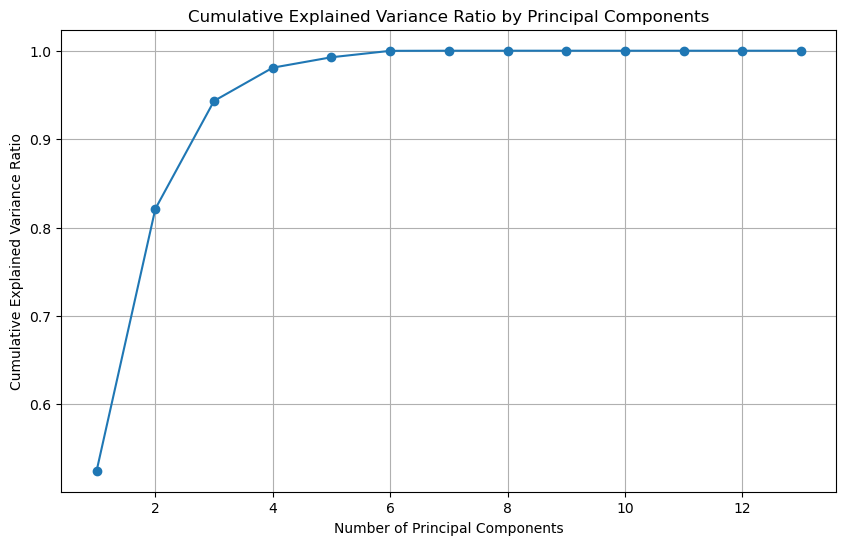

In [726]:
# Using PCA for demention reduction 
from sklearn.decomposition import PCA
import pandas as pd

# Anomal Data
anomalies = detection_data[detection_data['outlier'] == True]


# Standarlize 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(anomalies[columns])

# PCA
pca = PCA()
pca.fit(scaled_data)

# Cumulative vairance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [727]:
# Optimal number of components is 3
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

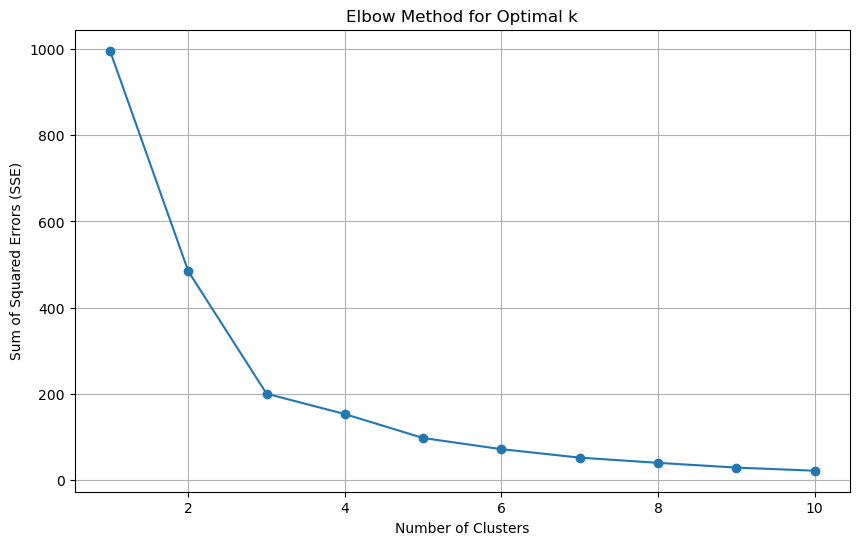

In [728]:
#Cluster analysis 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ELBOW method to get optimal cluster number 
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2000)
    kmeans.fit(principal_components)
    sse.append(kmeans.inertia_)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


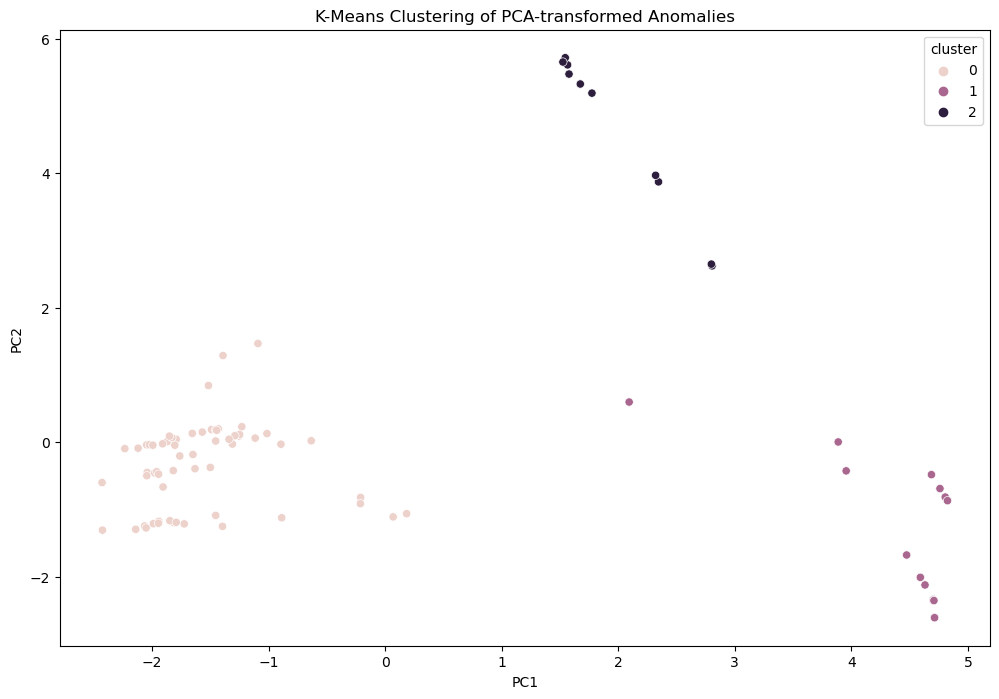

In [729]:
# Optimal k is 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=2000)
anomalies['cluster'] = kmeans.fit_predict(principal_components)

# Visualization in 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster')
plt.title('K-Means Clustering of PCA-transformed Anomalies')
plt.show()

In [730]:
# Cheack points data in each clusters
for cluster in range(optimal_k):
    cluster_data = anomalies[anomalies['cluster'] == cluster]
    print(f"Cluster {cluster} data points:")
    print(cluster_data)
    print("\n")


Cluster 0 data points:
                     Electricity:Facility [kW](Hourly)  \
formatted_timestamp                                      
06/08 15:00:00                                2.239011   
06/08 17:00:00                                2.889940   
06/08 18:00:00                                2.797174   
06/09 12:00:00                                2.024615   
06/12 16:00:00                                2.532455   
...                                                ...   
08/31 15:00:00                                2.480951   
08/31 16:00:00                                2.585054   
08/31 17:00:00                                2.884511   
09/01 13:00:00                                2.179378   
09/01 15:00:00                                2.445174   

                     Gas:Facility [kW](Hourly)  \
formatted_timestamp                              
06/08 15:00:00                        0.021274   
06/08 17:00:00                        0.030569   
06/08 18:00:00        

In [731]:
# Discribe 
for cluster in range(optimal_k):
    cluster_data = anomalies[anomalies['cluster'] == cluster]
    cluster_mean = cluster_data[columns].mean()
    cluster_std = cluster_data[columns].std()
    print(f"Cluster {cluster} mean values:")
    print(cluster_mean)
    print("\n")
    print(f"Cluster {cluster} standard deviation values:")
    print(cluster_std)
    print("\n")


Cluster 0 mean values:
Electricity:Facility [kW](Hourly)                      2.495487
Gas:Facility [kW](Hourly)                              0.024415
Heating:Electricity [kW](Hourly)                       0.000000
Heating:Gas [kW](Hourly)                               0.000000
Cooling:Electricity [kW](Hourly)                       1.148528
HVACFan:Fans:Electricity [kW](Hourly)                  0.312026
Electricity:HVAC [kW](Hourly)                          1.460553
Fans:Electricity [kW](Hourly)                          0.312026
General:InteriorLights:Electricity [kW](Hourly)        0.065949
General:ExteriorLights:Electricity [kW](Hourly)        0.014207
Appl:InteriorEquipment:Electricity [kW](Hourly)        0.337180
Misc:InteriorEquipment:Electricity [kW](Hourly)        0.354457
Water Heater:WaterSystems:Electricity [kW](Hourly)     0.243545
dtype: float64


Cluster 0 standard deviation values:
Electricity:Facility [kW](Hourly)                      0.302155
Gas:Facility [kW](Hourly)  

In [732]:
# Normal data
normal_data = detection_data[detection_data['outlier'] == False]

# Nomal data points mean and std
normal_mean = normal_data[columns].mean()
normal_std = normal_data[columns].std()

    
print(f"Normal mean values:")
print(normal_mean)
print("\n")
print(f"Normal standard deviation values:")
print(normal_std)
print("\n")




Normal mean values:
Electricity:Facility [kW](Hourly)                      1.427329
Gas:Facility [kW](Hourly)                              1.078439
Heating:Electricity [kW](Hourly)                       0.000000
Heating:Gas [kW](Hourly)                               1.051520
Cooling:Electricity [kW](Hourly)                       0.132527
HVACFan:Fans:Electricity [kW](Hourly)                  0.066312
Electricity:HVAC [kW](Hourly)                          0.198839
Fans:Electricity [kW](Hourly)                          0.066312
General:InteriorLights:Electricity [kW](Hourly)        0.195711
General:ExteriorLights:Electricity [kW](Hourly)        0.042161
Appl:InteriorEquipment:Electricity [kW](Hourly)        0.242899
Misc:InteriorEquipment:Electricity [kW](Hourly)        0.390817
Water Heater:WaterSystems:Electricity [kW](Hourly)     0.338446
dtype: float64


Normal standard deviation values:
Electricity:Facility [kW](Hourly)                      0.579933
Gas:Facility [kW](Hourly)        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


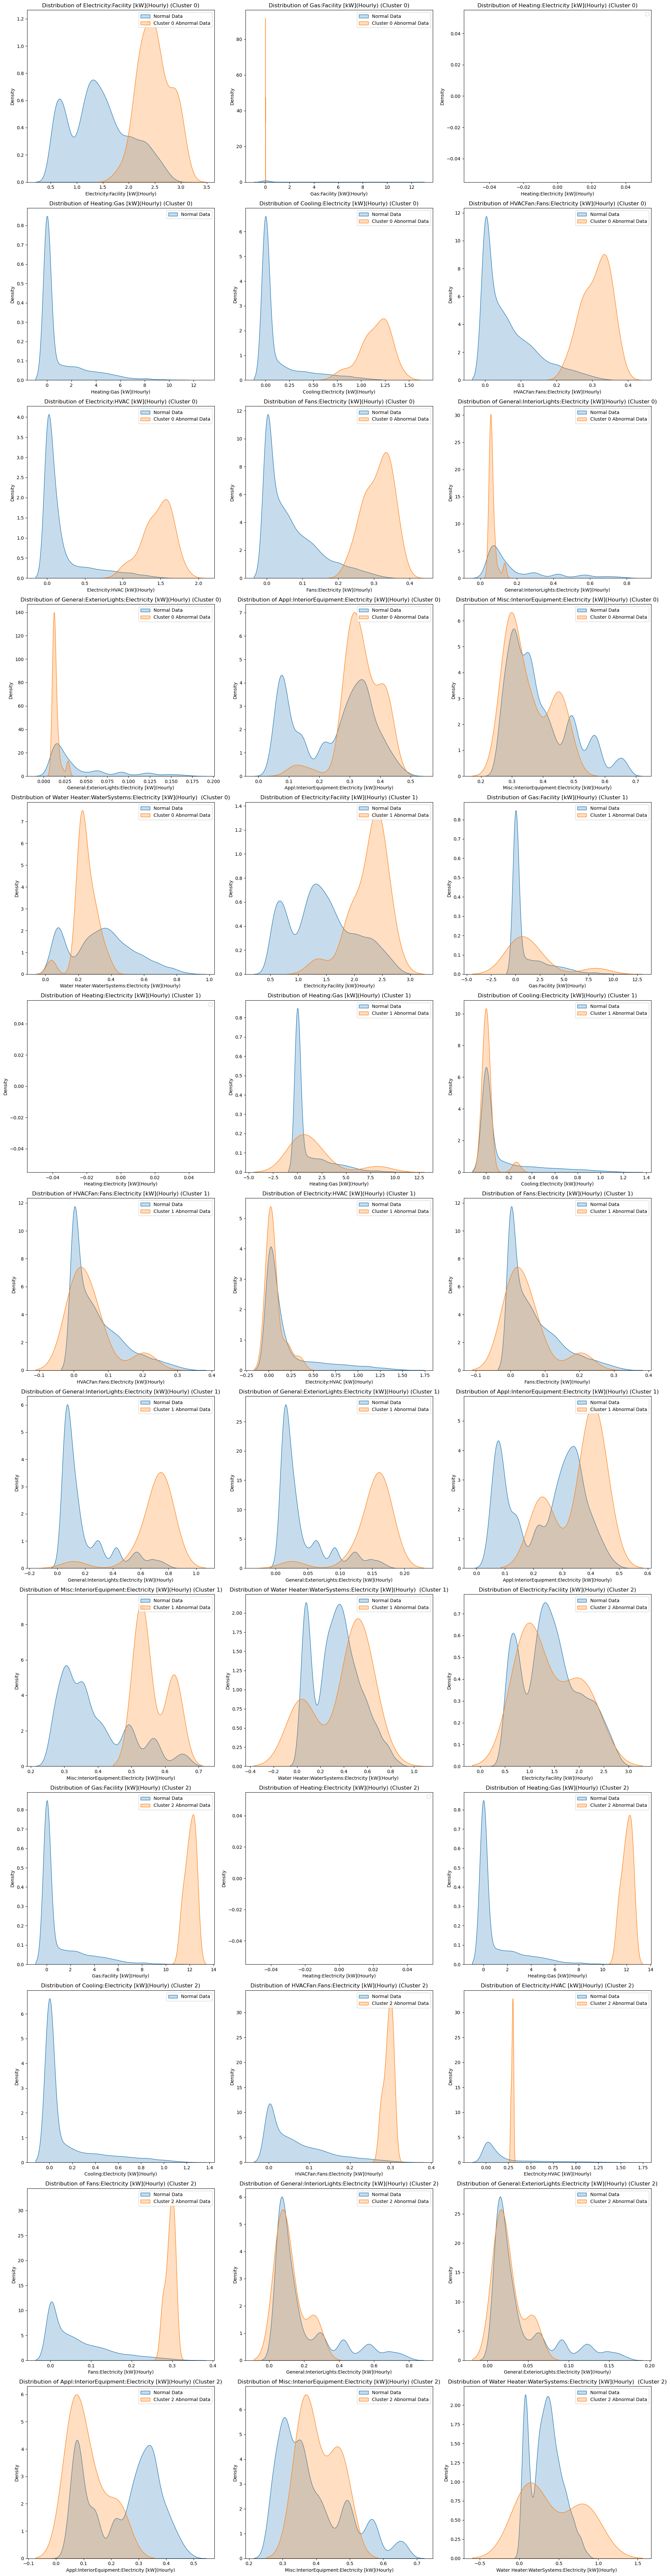

In [733]:
# Cluster num
num_clusters = 3

# Rows and cloumns number
n_cols = 3
n_rows = (len(columns) * num_clusters + n_cols - 1) // n_cols

# Create figures
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()

# Initialize 
plot_index = 0

# Loop cluster
for cluster in range(num_clusters):
    cluster_data = anomalies[anomalies['cluster'] == cluster]
    
    # Loop features
    for column in columns:
        sns.kdeplot(normal_data[column], label='Normal Data', shade=True, ax=axes[plot_index])
        sns.kdeplot(cluster_data[column], label=f'Cluster {cluster} Anomal Data', shade=True, ax=axes[plot_index])
        axes[plot_index].set_title(f'Distribution of {column} (Cluster {cluster})')
        axes[plot_index].legend()
        plot_index += 1

# Remove redundant subplots
for j in range(plot_index, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [734]:
anomalies

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),outlier,cluster
formatted_timestamp,,,,,,,,,,,,,,,
02/03 19:00:00,2.606842,8.505830,0.0,8.462487,0.0,0.210252,0.210252,0.210252,0.580410,0.125036,0.398174,0.629263,0.617063,True,1
02/04 05:00:00,0.940006,11.872530,0.0,11.848259,0.0,0.291574,0.291574,0.291574,0.061986,0.013353,0.065743,0.352374,0.138332,True,2
02/04 07:00:00,1.828694,11.986702,0.0,11.955408,0.0,0.293716,0.293716,0.293716,0.129606,0.027921,0.140300,0.454329,0.766178,True,2
02/04 08:00:00,2.217436,11.350599,0.0,11.317347,0.0,0.276458,0.276458,0.276458,0.259212,0.055841,0.228479,0.482758,0.883043,True,2
02/04 19:00:00,2.695022,7.954755,0.0,7.911412,0.0,0.196731,0.196731,0.196731,0.580410,0.125036,0.432484,0.629263,0.684453,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/22 19:00:00,2.433703,1.463044,0.0,1.426682,0.0,0.036496,0.036496,0.036496,0.734713,0.158277,0.402135,0.527909,0.527529,True,1
12/22 19:00:00,1.946927,1.494260,0.0,1.451141,0.0,0.037331,0.037331,0.037331,0.796653,0.171620,0.230146,0.626011,0.038522,True,1
12/23 19:00:00,1.941934,1.300238,0.0,1.257119,0.0,0.032338,0.032338,0.032338,0.796653,0.171620,0.230146,0.626011,0.038522,True,1


In [738]:
complete_df['cluster'] = anomalies['cluster']
complete_df['outlier'] = anomalies['outlier']
complete_df

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption,cluster,outlier
formatted_timestamp,,,,,,,,,,,,,,,,,,,,
01/01 01:00:00,NaN,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,5,1,18.035430,NaN,NaN
01/01 02:00:00,NaN,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,2,5,1,19.496637,NaN,NaN
01/01 03:00:00,NaN,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,3,5,1,20.757447,NaN,NaN
01/01 04:00:00,NaN,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,4,5,1,21.885034,NaN,NaN
01/01 05:00:00,NaN,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,5,5,1,23.323477,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 20:00:00,NaN,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,20,6,12,43.230105,NaN,NaN
12/31 21:00:00,NaN,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,21,6,12,43.920653,NaN,NaN
12/31 22:00:00,NaN,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,22,6,12,44.441100,NaN,NaN


In [775]:
# Groupby times by hour, weekday, and month
grouped_hour = complete_df.groupby(['cluster', 'hour'])['outlier'].sum().unstack(fill_value=0)
grouped_weekday = complete_df.groupby(['cluster', 'weekday'])['outlier'].sum().unstack(fill_value=0)
grouped_month = complete_df.groupby(['cluster', 'month'])['outlier'].sum().unstack(fill_value=0)
# Transform the data from bool into int
for df in [grouped_hour, grouped_weekday, grouped_month]:
    df.replace({True: 1, False: 0}, inplace=True)
grouped_hour

hour,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8
cluster,,,,,,,,,,,,,,,
0.0,2,5,11,14,11,12,6,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,1,16,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,1,1,1,2,1,2,2


In [772]:
#Plot function
def plot_distribution(cluster_number):
    #Cluster 0

    cluster_hour = grouped_hour.iloc[cluster_number]  
    cluster_weekday = grouped_weekday.iloc[cluster_number]  
    cluster_month = grouped_month.iloc[cluster_number]  

    # Figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Hourly distribution
    cluster_hour.plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title(f'Hourly Distribution of Outliers - Cluster {cluster_number}')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Number of Outliers')

    # Weekday distribution
    cluster_weekday.plot(kind='bar', ax=axes[1], color='orange')
    axes[1].set_title(f'Weekday Distribution of Outliers- Cluster {cluster_number}')
    axes[1].set_xlabel('Day of the Week')
    axes[1].set_ylabel('Number of Outliers')
    axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

    # Monthly distribution
    cluster_month.plot(kind='bar', ax=axes[2], color='green')
    axes[2].set_title(f'Monthly Distribution of Outliers- Cluster {cluster_number}')
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('Number of Outliers')

    # Prevent overlap
    plt.tight_layout()

    # Show
    plt.show()



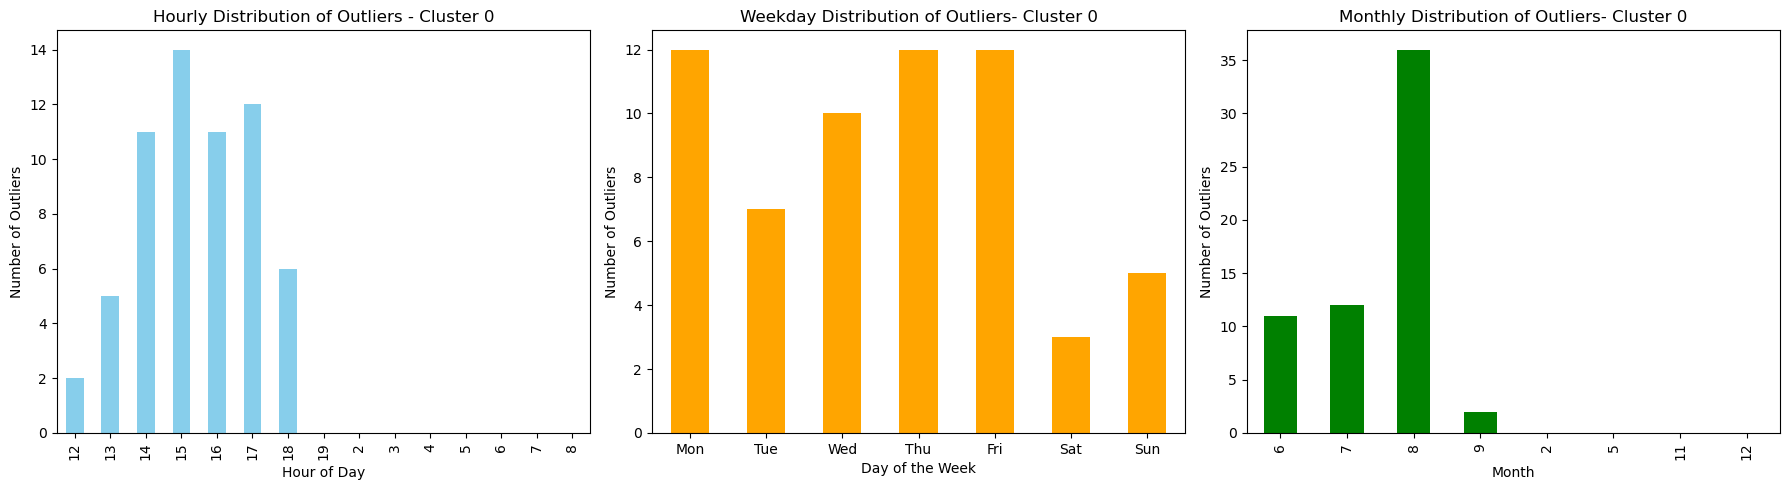

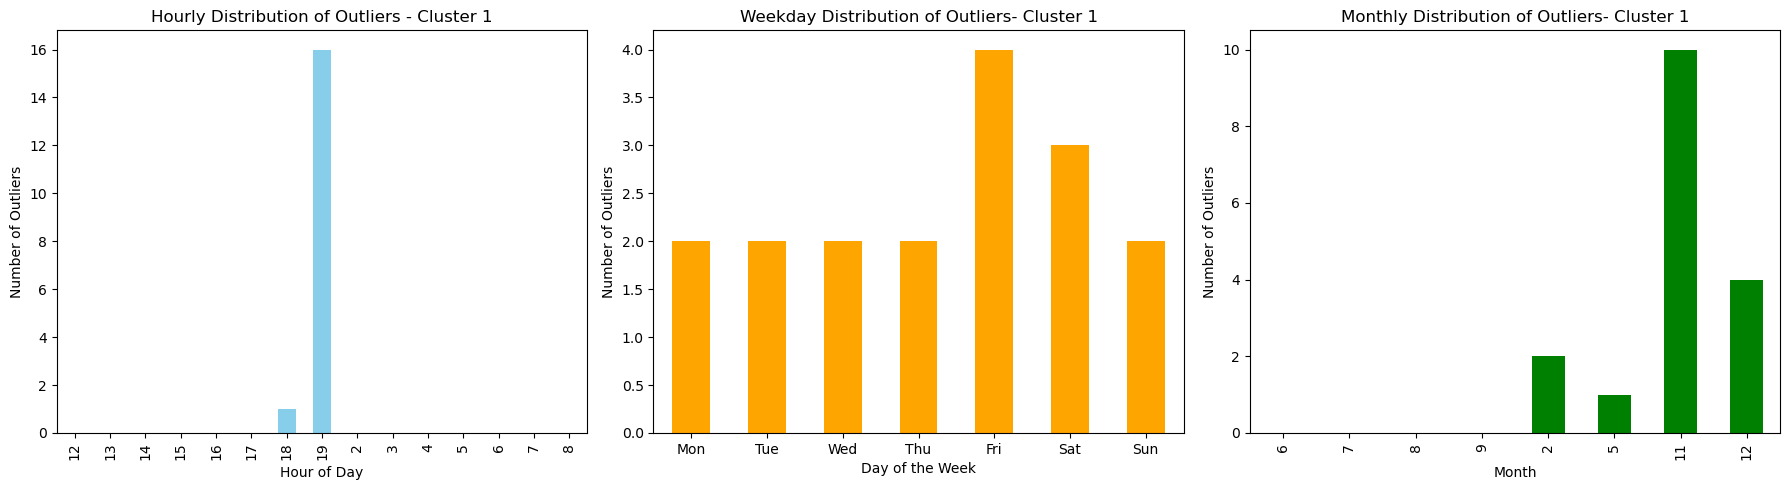

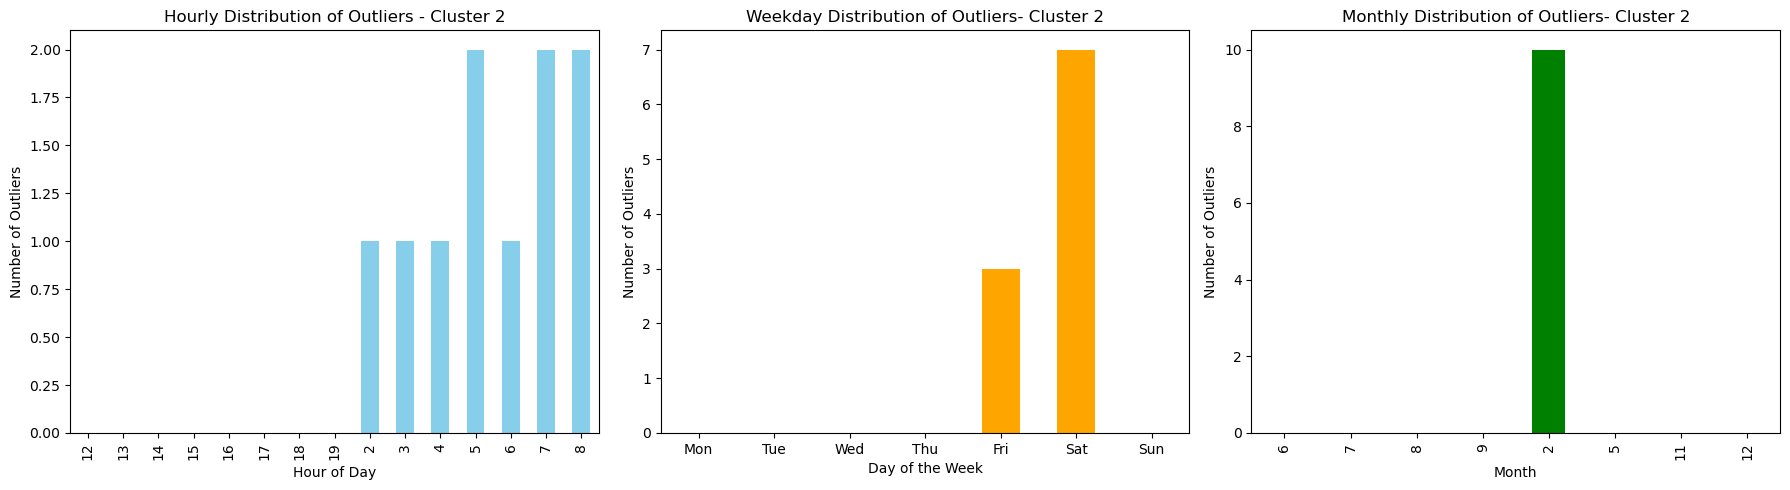

In [774]:
#Cluster 0
plot_distribution(0)
#Cluster 1
plot_distribution(1)
#Cluster 2
plot_distribution(2)


In [776]:
#Check outlier of cluster 1
complete_df[complete_df['cluster']== 1]

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption,cluster,outlier
formatted_timestamp,,,,,,,,,,,,,,,,,,,,
02/03 19:00:00,NaN,2.606842,8.505830,0.0,8.462487,0.000000,0.210252,0.210252,0.210252,0.580410,0.125036,0.398174,0.629263,0.617063,19,3,2,46.555862,1.0,True
02/04 19:00:00,NaN,2.695022,7.954755,0.0,7.911412,0.000000,0.196731,0.196731,0.196731,0.580410,0.125036,0.432484,0.629263,0.684453,19,4,2,46.603030,1.0,True
05/27 18:00:00,NaN,1.350421,0.037818,0.0,0.000000,0.263889,0.082683,0.346572,0.082683,0.118115,0.025445,0.229339,0.549047,0.035259,18,5,5,31.121272,1.0,True
11/01 19:00:00,NaN,2.347086,0.036362,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.734713,0.158277,0.402135,0.527909,0.477408,19,2,11,36.683889,1.0,True
11/02 19:00:00,NaN,2.347969,0.036362,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.734713,0.158277,0.402135,0.527909,0.478291,19,3,11,37.685656,1.0,True
11/03 19:00:00,NaN,2.349464,0.036362,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.734713,0.158277,0.402135,0.527909,0.479786,19,4,11,38.688647,1.0,True
11/04 19:00:00,NaN,2.437550,0.036362,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.734713,0.158277,0.436446,0.527909,0.533561,19,5,11,39.864817,1.0,True
11/05 19:00:00,NaN,2.440476,0.036362,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.734713,0.158277,0.436446,0.527909,0.536488,19,6,11,40.870670,1.0,True
11/06 19:00:00,NaN,2.356278,0.036362,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.734713,0.158277,0.402135,0.527909,0.486600,19,0,11,34.702273,1.0,True


In [778]:
#drop outlier
filtered_df = complete_df[~((complete_df['cluster'] == 1) & (complete_df['month'] == 5))]
filtered_df

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption,cluster,outlier
formatted_timestamp,,,,,,,,,,,,,,,,,,,,
01/01 01:00:00,NaN,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,5,1,18.035430,NaN,NaN
01/01 02:00:00,NaN,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,2,5,1,19.496637,NaN,NaN
01/01 03:00:00,NaN,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,3,5,1,20.757447,NaN,NaN
01/01 04:00:00,NaN,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,4,5,1,21.885034,NaN,NaN
01/01 05:00:00,NaN,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,5,5,1,23.323477,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 20:00:00,NaN,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,20,6,12,43.230105,NaN,NaN
12/31 21:00:00,NaN,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,21,6,12,43.920653,NaN,NaN
12/31 22:00:00,NaN,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,22,6,12,44.441100,NaN,NaN


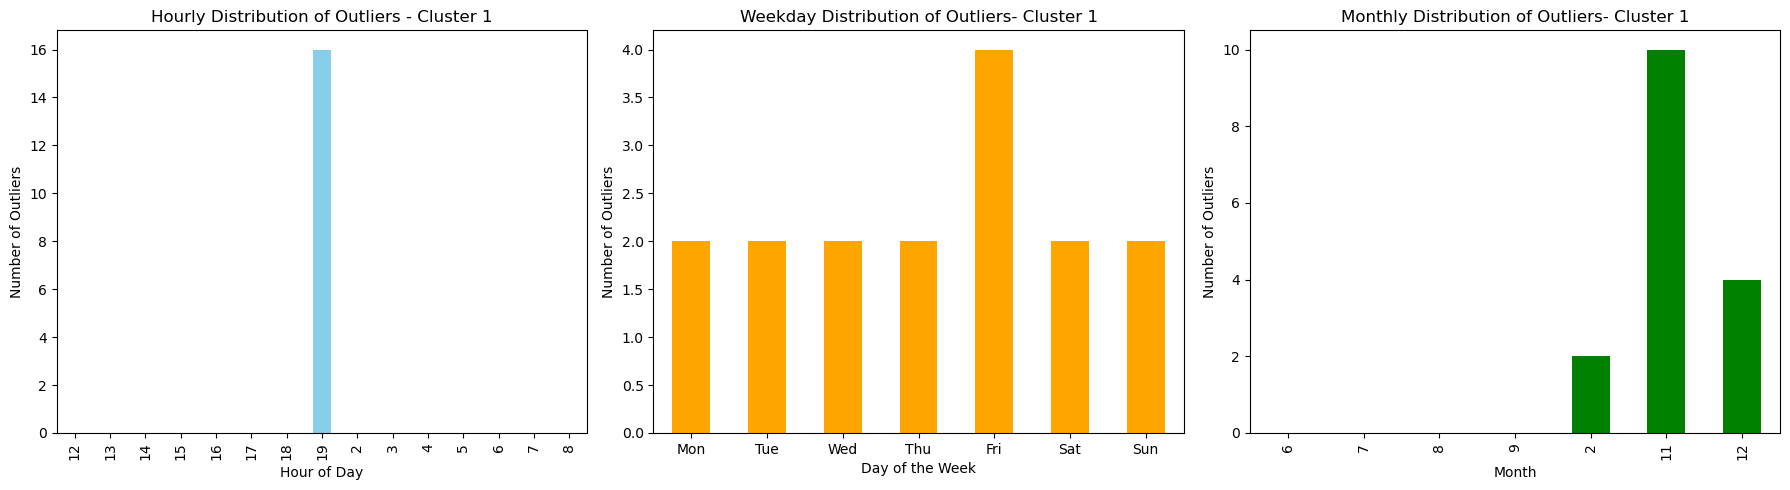

In [779]:
#New cluster 1
# Groupby times by hour, weekday, and month
grouped_hour = filtered_df.groupby(['cluster', 'hour'])['outlier'].sum().unstack(fill_value=0)
grouped_weekday = filtered_df.groupby(['cluster', 'weekday'])['outlier'].sum().unstack(fill_value=0)
grouped_month = filtered_df.groupby(['cluster', 'month'])['outlier'].sum().unstack(fill_value=0)
# Transform the data from bool into int
for df in [grouped_hour, grouped_weekday, grouped_month]:
    df.replace({True: 1, False: 0}, inplace=True)
grouped_hour

cluster_hour = grouped_hour.iloc[1]  
cluster_weekday = grouped_weekday.iloc[1]  
cluster_month = grouped_month.iloc[1]  

# Figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hourly distribution
cluster_hour.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title(f'Hourly Distribution of Outliers - Cluster 1')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Outliers')

# Weekday distribution
cluster_weekday.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title(f'Weekday Distribution of Outliers- Cluster 1')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Outliers')
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

# Monthly distribution
cluster_month.plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title(f'Monthly Distribution of Outliers- Cluster 1')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Outliers')

# Prevent overlap
plt.tight_layout()

# Show
plt.show()

In [780]:
#Cluster 2 more 
filtered_df_2 = complete_df[(complete_df['month'] == 2) & (complete_df['cluster'] != 2)]
filtered_df_2

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption,cluster,outlier
formatted_timestamp,,,,,,,,,,,,,,,,,,,,
02/01 00:00:00,NaN,1.368525,3.487770,0.0,3.453959,0.0,0.088390,0.088390,0.088390,0.295204,0.063595,0.135921,0.490883,0.277888,0,1,2,12.838915,NaN,NaN
02/01 01:00:00,NaN,0.951866,4.109066,0.0,4.080953,0.0,0.104177,0.104177,0.104177,0.152146,0.032776,0.086281,0.408144,0.151697,1,1,2,14.285461,NaN,NaN
02/01 02:00:00,NaN,0.785802,4.638886,0.0,4.613002,0.0,0.117391,0.117391,0.117391,0.090161,0.019423,0.072153,0.375793,0.094237,2,1,2,16.041631,NaN,NaN
02/01 03:00:00,NaN,0.730934,5.123037,0.0,5.097453,0.0,0.129315,0.129315,0.129315,0.061986,0.013353,0.059631,0.371436,0.078568,3,1,2,17.924343,NaN,NaN
02/01 04:00:00,NaN,0.733624,5.551273,0.0,5.526049,0.0,0.139831,0.139831,0.139831,0.061986,0.013353,0.052529,0.366208,0.083073,4,1,2,19.807589,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02/28 20:00:00,NaN,2.515408,0.546091,0.0,0.501353,0.0,0.012977,0.012977,0.012977,0.743827,0.160240,0.315239,0.649523,0.616957,20,0,2,28.087570,NaN,NaN
02/28 21:00:00,NaN,2.389813,0.872580,0.0,0.826303,0.0,0.021345,0.021345,0.021345,0.693111,0.149315,0.275771,0.671853,0.561773,21,0,2,29.504557,NaN,NaN
02/28 22:00:00,NaN,2.158786,1.386382,0.0,1.341185,0.0,0.034559,0.034559,0.034559,0.574775,0.123822,0.258241,0.656168,0.494578,22,0,2,31.097614,NaN,NaN


In [781]:
night_time_df = filtered_df_2[(filtered_df_2['hour'] >= 2) & (filtered_df_2['hour'] < 8)]
average_values = night_time_df.mean()
print(average_values)


kW                                                           NaN
Electricity:Facility [kW](Hourly)                       0.912799
Gas:Facility [kW](Hourly)                               4.070987
Heating:Electricity [kW](Hourly)                             0.0
Heating:Gas [kW](Hourly)                                4.044445
Cooling:Electricity [kW](Hourly)                             0.0
HVACFan:Fans:Electricity [kW](Hourly)                   0.102249
Electricity:HVAC [kW](Hourly)                           0.102249
Fans:Electricity [kW](Hourly)                           0.102249
General:InteriorLights:Electricity [kW](Hourly)         0.078679
General:ExteriorLights:Electricity [kW](Hourly)          0.01695
Appl:InteriorEquipment:Electricity [kW](Hourly)         0.076257
Misc:InteriorEquipment:Electricity [kW](Hourly)         0.385338
Water Heater:WaterSystems:Electricity [kW](Hourly)      0.236682
hour                                                     4.48125
weekday                  

## Appliance’s electricity consumption : STL

In [808]:
valid_kW = complete_df[complete_df['kW'].notna()]

valid_kW

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption,cluster,outlier
formatted_timestamp,,,,,,,,,,,,,,,,,,,,
06/07 11:00:00,57.388943,1.479426,0.018757,0.0,0.0,0.347519,0.100007,0.447526,0.100007,0.047163,0.010160,0.360615,0.272322,0.324996,11,2,6,79.897441,NaN,NaN
06/07 12:00:00,27.227961,1.559733,0.018441,0.0,0.0,0.454263,0.130764,0.585027,0.130764,0.047163,0.010160,0.350008,0.267735,0.282996,12,2,6,51.065016,NaN,NaN
06/07 13:00:00,111.476298,1.702835,0.019079,0.0,0.0,0.603876,0.169912,0.773789,0.169912,0.047163,0.010160,0.319024,0.276993,0.259063,13,2,6,136.828105,NaN,NaN
06/07 14:00:00,109.021960,1.859094,0.020153,0.0,0.0,0.752179,0.211629,0.963808,0.211629,0.047163,0.010160,0.294229,0.292590,0.234500,14,2,6,135.919095,NaN,NaN
06/07 15:00:00,5.773963,2.100629,0.021274,0.0,0.0,0.921579,0.253177,1.174756,0.253177,0.050307,0.010837,0.301026,0.308854,0.238204,15,2,6,34.407785,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/17 19:00:00,0.081495,2.673612,0.034257,0.0,0.0,0.669111,0.206351,0.875462,0.206351,0.412747,0.088917,0.348977,0.497352,0.433512,19,6,9,40.528146,NaN,NaN
09/17 20:00:00,0.081474,2.802815,0.035435,0.0,0.0,0.618448,0.190689,0.809137,0.190689,0.616948,0.132907,0.316662,0.514451,0.396065,20,6,9,41.705721,NaN,NaN
09/17 21:00:00,0.082655,2.605447,0.034608,0.0,0.0,0.566775,0.173302,0.740077,0.173302,0.573501,0.123547,0.302602,0.502440,0.346635,21,6,9,42.224892,NaN,NaN


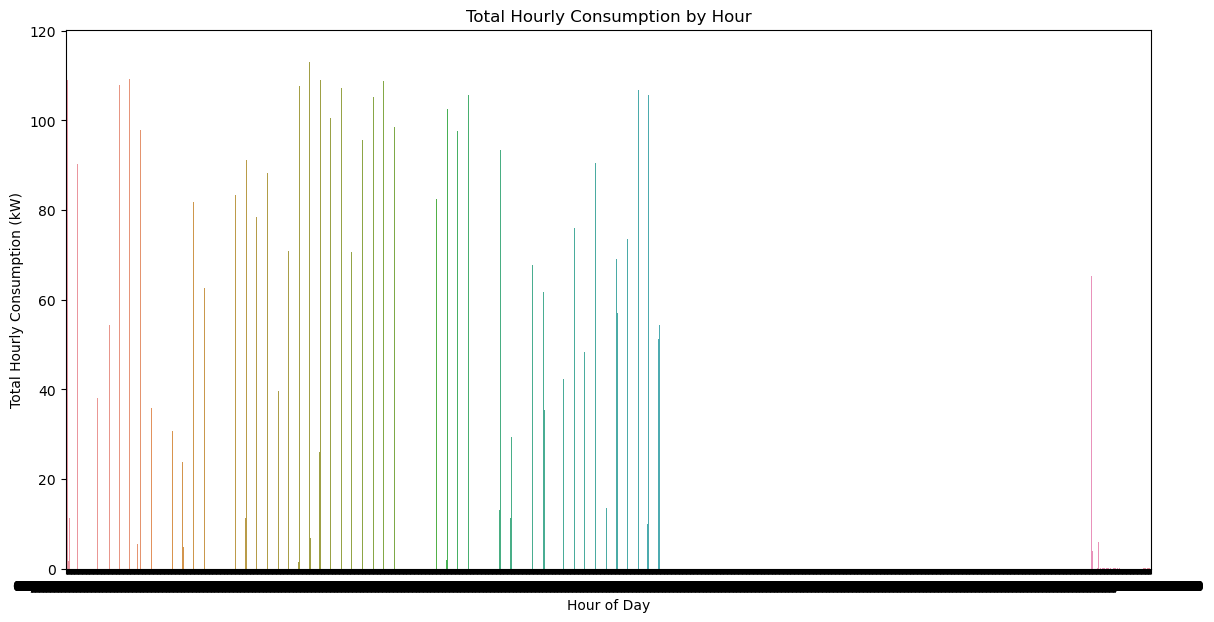

In [831]:
#visualizition
plt.figure(figsize=(14, 7))
sns.barplot(x=valid_kW.index, y=valid_kW['kW'])
plt.title('Total Hourly Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Hourly Consumption (kW)')
plt.show()

In [820]:
from statsmodels.tsa.seasonal import STL
from itertools import product

#parameters 
seasonal_options = [7, 13, 23]  #Smoothness of the seasonal component
period_options = [24]  # 24hours 

# initialize best parameters and residual 
best_parameters = None
min_residual_var = np.inf

# Loop
for seasonal, period in product(seasonal_options, period_options):
    # STL
    stl = STL(valid_kW['kW'], seasonal=seasonal, period=period)
    result = stl.fit()
    
    # Variance
    residual_var = result.resid.var()
    
    # Update best variance
    if residual_var < min_residual_var:
        min_residual_var = residual_var
        best_parameters = (seasonal, period)

# Best parameters and min residual 
best_parameters, min_residual_var



((7, 24), 60.193573759483364)

In [823]:
stl = STL(valid_kW['kW'], seasonal=7, period=24)  
result = stl.fit()

# Get trend, seasonal and residual
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Anomaly: Residual > 2 * std
residual_std = residual.std()
anomalies = residual[abs(residual) > 2 * residual_std]

In [824]:
valid_kW['trend'] = trend
valid_kW['seasonal'] = seasonal
valid_kW['residual'] = residual
valid_kW['is_anomaly'] = valid_kW['residual'].apply(lambda x: 'Yes' if abs(x) > 2 * residual_std else 'No')


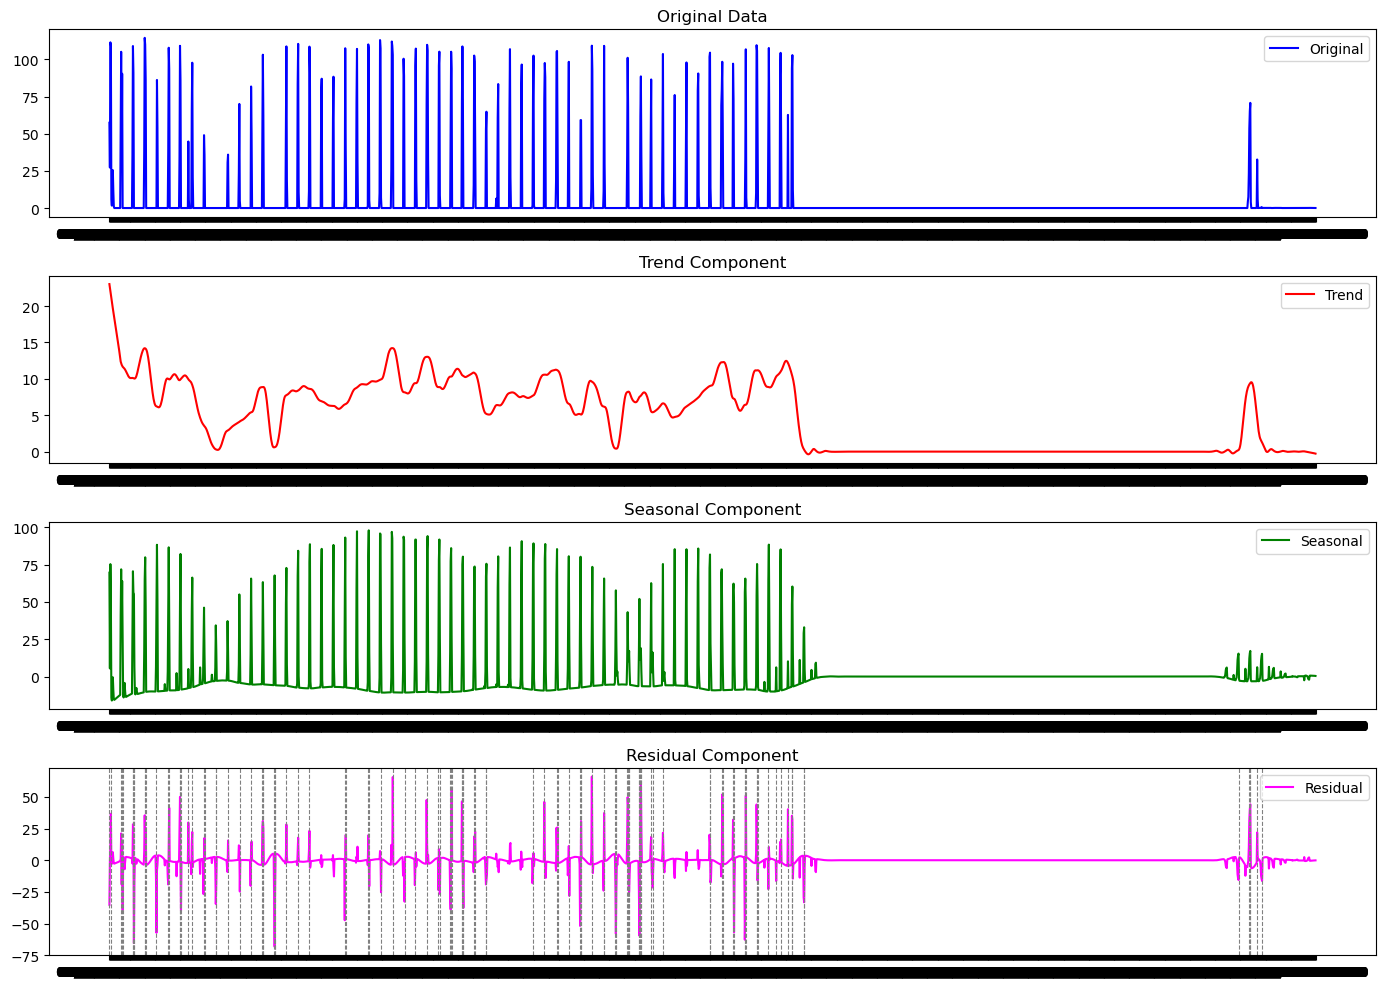

In [826]:
import matplotlib.pyplot as plt

# Figure
plt.figure(figsize=(14, 10))

# Initial data
plt.subplot(411)
plt.plot(valid_kW.index, valid_kW['kW'], label='Original', color='blue')
plt.title('Original Data')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(valid_kW.index, valid_kW['trend'], label='Trend', color='red')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(valid_kW.index, valid_kW['seasonal'], label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(valid_kW.index, valid_kW['residual'], label='Residual', color='magenta')
plt.title('Residual Component')
plt.legend()

# Mark anomaly data
for time_point in anomalies.index:
    plt.axvline(x=time_point, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()


In [832]:
anomaly_data = valid_kW[valid_kW['is_anomaly'] == 'Yes']
anomaly_data

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),...,hour,weekday,month,Total_Hourly_Consumption,cluster,outlier,trend,seasonal,residual,is_anomaly
formatted_timestamp,,,,,,,,,,,,,,,,,,,,,
06/07 11:00:00,57.388943,1.479426,0.018757,0.0,0.0,0.347519,0.100007,0.447526,0.100007,0.047163,...,11,2,6,79.897441,NaN,NaN,23.013980,69.597069,-35.222105,Yes
06/07 14:00:00,109.021960,1.859094,0.020153,0.0,0.0,0.752179,0.211629,0.963808,0.211629,0.047163,...,14,2,6,135.919095,NaN,NaN,21.549788,50.730648,36.741524,Yes
06/08 11:00:00,105.125872,1.476459,0.018757,0.0,0.0,0.345614,0.100599,0.446212,0.100599,0.047163,...,11,3,6,128.627713,NaN,NaN,12.128877,71.832123,21.164871,Yes
06/08 12:00:00,24.332633,1.634958,0.018441,0.0,0.0,0.519104,0.142569,0.661672,0.142569,0.047163,...,12,3,6,49.408587,NaN,NaN,11.937040,31.668631,-19.273039,Yes
06/08 14:00:00,0.000000,1.974050,0.020153,0.0,0.0,0.851575,0.228324,1.079899,0.228324,0.047163,...,14,3,6,28.259834,NaN,NaN,11.667857,27.613589,-39.281446,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/12 08:00:00,53.714018,1.449928,0.021526,0.0,0.0,0.121512,0.037449,0.158961,0.037449,0.191167,...,8,1,9,74.815167,NaN,NaN,9.224201,12.272899,32.216919,Yes
09/12 09:00:00,65.196194,1.385936,0.018321,0.0,0.0,0.189882,0.056829,0.246711,0.056829,0.095584,...,9,1,9,87.273284,NaN,NaN,9.332829,15.701833,40.161532,Yes
09/12 10:00:00,70.753791,1.542887,0.018752,0.0,0.0,0.361402,0.103701,0.465103,0.103701,0.073860,...,10,1,9,94.410476,NaN,NaN,9.430112,17.159297,44.164381,Yes


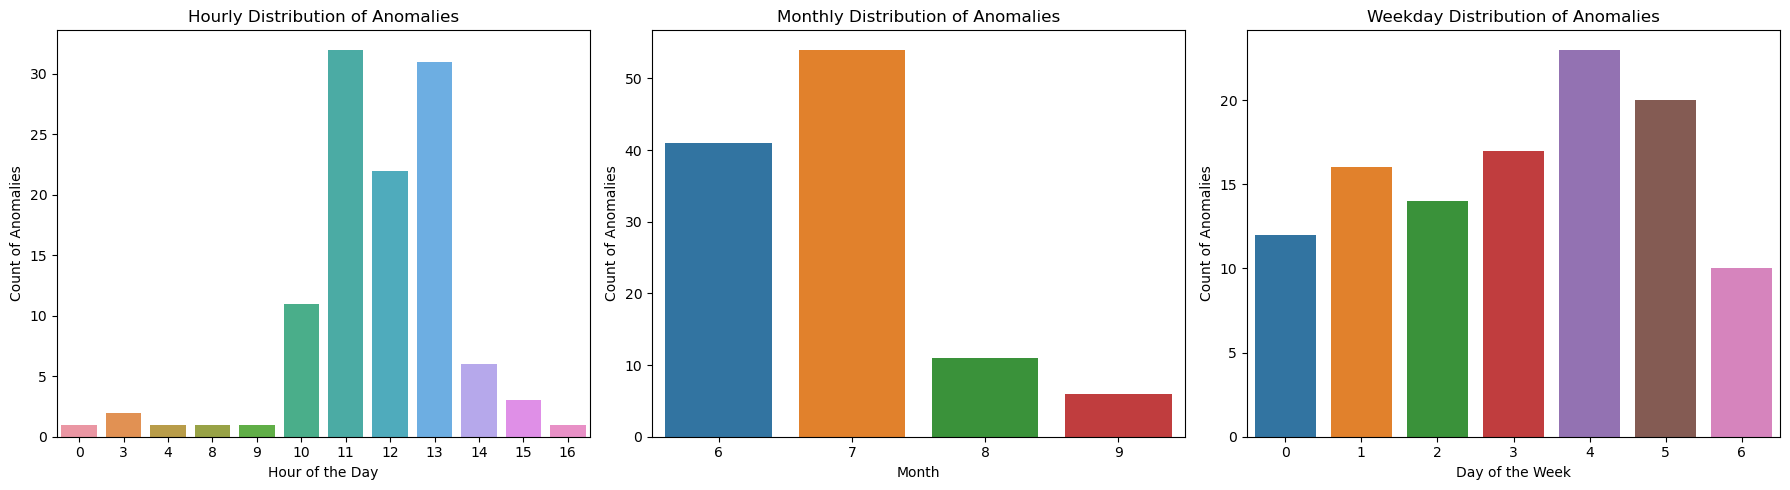

In [830]:
# hourly
plt.figure(figsize=(18, 5))
plt.subplot(131)
sns.countplot(x=anomaly_data['hour'], data=anomaly_data)
plt.title('Hourly Distribution of Anomalies')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Anomalies')

# monthly
plt.subplot(132)
sns.countplot(x=anomaly_data['month'], data=anomaly_data)
plt.title('Monthly Distribution of Anomalies')
plt.xlabel('Month')
plt.ylabel('Count of Anomalies')

# weekday
plt.subplot(133)
sns.countplot(x=anomaly_data['weekday'], data=anomaly_data)
plt.title('Weekday Distribution of Anomalies')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Anomalies')

plt.tight_layout()
plt.show()


In [833]:
valid_kW

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),...,hour,weekday,month,Total_Hourly_Consumption,cluster,outlier,trend,seasonal,residual,is_anomaly
formatted_timestamp,,,,,,,,,,,,,,,,,,,,,
06/07 11:00:00,57.388943,1.479426,0.018757,0.0,0.0,0.347519,0.100007,0.447526,0.100007,0.047163,...,11,2,6,79.897441,NaN,NaN,23.013980,69.597069,-35.222105,Yes
06/07 12:00:00,27.227961,1.559733,0.018441,0.0,0.0,0.454263,0.130764,0.585027,0.130764,0.047163,...,12,2,6,51.065016,NaN,NaN,22.523166,5.428864,-0.724069,No
06/07 13:00:00,111.476298,1.702835,0.019079,0.0,0.0,0.603876,0.169912,0.773789,0.169912,0.047163,...,13,2,6,136.828105,NaN,NaN,22.034484,75.313826,14.127988,No
06/07 14:00:00,109.021960,1.859094,0.020153,0.0,0.0,0.752179,0.211629,0.963808,0.211629,0.047163,...,14,2,6,135.919095,NaN,NaN,21.549788,50.730648,36.741524,Yes
06/07 15:00:00,5.773963,2.100629,0.021274,0.0,0.0,0.921579,0.253177,1.174756,0.253177,0.050307,...,15,2,6,34.407785,NaN,NaN,21.070381,-13.749570,-1.546848,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/17 19:00:00,0.081495,2.673612,0.034257,0.0,0.0,0.669111,0.206351,0.875462,0.206351,0.412747,...,19,6,9,40.528146,NaN,NaN,-0.208179,0.507709,-0.218035,No
09/17 20:00:00,0.081474,2.802815,0.035435,0.0,0.0,0.618448,0.190689,0.809137,0.190689,0.616948,...,20,6,9,41.705721,NaN,NaN,-0.224432,0.488856,-0.182950,No
09/17 21:00:00,0.082655,2.605447,0.034608,0.0,0.0,0.566775,0.173302,0.740077,0.173302,0.573501,...,21,6,9,42.224892,NaN,NaN,-0.241349,0.473976,-0.149973,No


         Normal    Anomaly
hour                      
0      0.001559  32.648945
1      0.059078        NaN
2      0.000710        NaN
3      0.000750  31.324066
4      0.000733  44.752200
5      0.097996        NaN
6      0.074100        NaN
7      0.229707        NaN
8      0.064067  53.714018
9      0.006860  65.196194
10     2.572912  29.380500
11    26.972909  57.534993
12    42.775524  67.476874
13     8.350263  36.145264
14     0.074743  37.971746
15     0.060056  29.523033
16     0.018231  35.360778
17     0.119694        NaN
18     0.249813        NaN
19     0.112722        NaN
20     0.012659        NaN
21     0.002445        NaN
22     0.002513        NaN
23     0.002357        NaN
         Normal    Anomaly
month                     
6      4.568730  49.229042
7      5.093094  46.497968
8      0.516232  57.122550
9      0.124365  37.065080
           Normal    Anomaly
weekday                     
0        2.532525  41.186834
1        2.887296  65.087054
2        3.657624  3

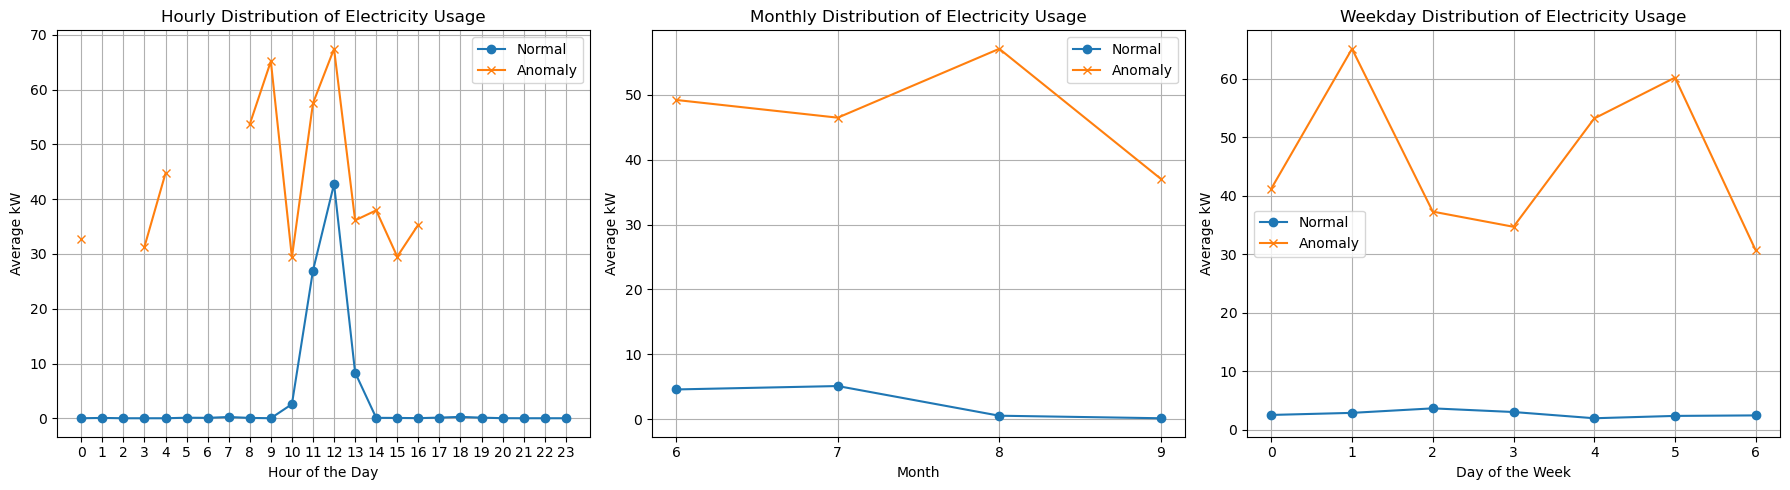

In [845]:
# Groupby hour and is_anomaly, compute mean kW
average_by_hour = valid_kW.groupby(['hour', 'is_anomaly'])['kW'].mean().unstack()

# Groupby month and is_anomaly, compute mean kW
average_by_month = valid_kW.groupby(['month', 'is_anomaly'])['kW'].mean().unstack()

# Groupby weekday and is_anomaly, compute mean kW
average_by_weekday = valid_kW.groupby(['weekday', 'is_anomaly'])['kW'].mean().unstack()



# Anomaly and Normal
average_by_hour.columns = ['Normal', 'Anomaly']
average_by_month.columns = ['Normal', 'Anomaly']
average_by_weekday.columns = ['Normal', 'Anomaly']

# Result
print(average_by_hour)
print(average_by_month)
print(average_by_weekday)


# hourly
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(average_by_hour.index, average_by_hour['Normal'], label='Normal', marker='o')
plt.plot(average_by_hour.index, average_by_hour['Anomaly'], label='Anomaly', marker='x')
plt.title('Hourly Distribution of Electricity Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average kW')
plt.legend()
plt.grid(True)
plt.xticks(average_by_hour.index)

# monthly
plt.subplot(132)
plt.plot(average_by_month.index, average_by_month['Normal'], label='Normal', marker='o')
plt.plot(average_by_month.index, average_by_month['Anomaly'], label='Anomaly', marker='x')
plt.title('Monthly Distribution of Electricity Usage')
plt.xlabel('Month')
plt.ylabel('Average kW')
plt.legend()
plt.grid(True)
plt.xticks(average_by_month.index)

# weekday
plt.subplot(133)
plt.plot(average_by_weekday.index, average_by_weekday['Normal'], label='Normal', marker='o')
plt.plot(average_by_weekday.index, average_by_weekday['Anomaly'], label='Anomaly', marker='x')
plt.title('Weekday Distribution of Electricity Usage')
plt.xlabel('Day of the Week')
plt.ylabel('Average kW')
plt.legend()
plt.grid(True)
plt.xticks(average_by_weekday.index)

plt.tight_layout()
plt.show()
